# Reading The Data
- Using pynwb

In [1]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

with NWBHDF5IO("sub-440956_ses-20190208T133600_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    print(read_nwbfile.acquisition)

{'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x2204187093024
Fields:
  time_series: {
    delay_start_times <class 'pynwb.base.TimeSeries'>,
    delay_stop_times <class 'pynwb.base.TimeSeries'>,
    go_start_times <class 'pynwb.base.TimeSeries'>,
    go_stop_times <class 'pynwb.base.TimeSeries'>,
    left_lick_times <class 'pynwb.base.TimeSeries'>,
    photostim_start_times <class 'pynwb.base.TimeSeries'>,
    photostim_stop_times <class 'pynwb.base.TimeSeries'>,
    presample_start_times <class 'pynwb.base.TimeSeries'>,
    presample_stop_times <class 'pynwb.base.TimeSeries'>,
    right_lick_times <class 'pynwb.base.TimeSeries'>,
    sample_start_times <class 'pynwb.base.TimeSeries'>,
    sample_stop_times <class 'pynwb.base.TimeSeries'>,
    trialend_start_times <class 'pynwb.base.TimeSeries'>,
    trialend_stop_times <class 'pynwb.base.TimeSeries'>
  }
, 'BehavioralTimeSeries': BehavioralTimeSeries pynwb.behavior.BehavioralTimeSeries at 0x2204187443312
Fi

# Exploring functionalies of nwb module

In [2]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("sub-440956_ses-20190208T133600_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x2204286262480
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC015
  sex: M
  species: Mus musculus
  subject_id: 440956

In [4]:
trials_df = nwbfile.trials.to_dataframe()
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water
id,,,,,,,,,,,,,,
0,0.0000,5.0097,1,N/A,N/A,N/A,1,audio delay,1,right,no early,hit,0,0
1,8.1746,13.1813,2,N/A,N/A,N/A,2,audio delay,1,right,no early,hit,0,0
2,14.9698,19.7441,3,N/A,N/A,N/A,3,audio delay,1,right,no early,hit,0,0
3,22.2958,27.1855,4,N/A,N/A,N/A,4,audio delay,1,right,no early,hit,0,0
4,29.0118,34.4933,5,N/A,N/A,N/A,5,audio delay,1,left,early,miss,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3675.0971,3679.9248,476,N/A,N/A,N/A,476,audio delay,1,right,no early,hit,0,0
476,3682.5639,3687.4412,477,N/A,N/A,N/A,477,audio delay,1,right,no early,hit,0,0
477,3690.0865,3694.8972,478,1.885,5.500,0.5000,478,audio delay,1,left,no early,hit,0,0


In [5]:
units_df = nwbfile.units.to_dataframe()
units_df

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,velocity_below,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,0,30000,multi,27.0,0.0,149.633789,1.415075,0.000000,0.057672,0.060731,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[4.03319688912489, 12.70666199028291, 12.71326...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[-10.72998046875, -9.8876953125, -7.6904296875...",[nan]
1,1,30000,multi,11.0,20.0,140.104167,2.078204,1.000000,8.269580,0.261685,...,-1.37353,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.009678202070164676, 0.22887740414853575, 0....","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[3.283292483660131, 3.64328022875817, 3.587111...",[nan]
2,2,30000,multi,59.0,0.0,109.799425,1.501393,1.000000,5.755460,0.345787,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.4034101021537597, 0.4052767620254736, 0.488...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[5.347241237677984, 4.998117469879518, 5.19321...",[nan]
3,3,30000,good,27.0,0.0,496.996177,6.742492,0.031073,2.856550,0.086241,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.233244054919866, 0.3196104071986161, 0.3961...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[13.335435056746533, 12.865502837326607, 12.61...",[nan]
4,4,30000,multi,59.0,0.0,138.363863,1.815785,1.000000,2.760130,0.196675,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.00017823665162230995, 0.033944780402441754,...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[-0.1744043733681462, 1.0066498041775458, 1.70...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,380,30000,multi,11.0,3020.0,120.442708,2.307442,0.000000,0.016220,0.025510,...,-1.34902,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[183.17030156528872, 257.43624151420437, 361.5...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.6927083333333335, -4.947916666666667, -8.98...",[nan]
1731,381,30000,good,59.0,3160.0,73.560065,1.596836,0.039881,8.009950,0.211159,...,-2.11755,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.07334449245718444, 0.3905134239842827, 0.64...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.6118104757085017, 2.3888221153846154, 2.149...",[nan]
1732,382,30000,multi,59.0,3280.0,104.045759,2.000715,0.000000,0.025231,0.008065,...,-3.04469,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[1.577321898823043, 76.21242953674648, 104.466...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.6696428571428571, -5.2734375, -4.268973214...",[nan]


In [6]:
import ast

In [7]:
units_df.electrodes.apply(lambda x: len(x)).value_counts()
units_df.electrodes.apply(lambda x: type(x)).value_counts()

<class 'pandas.core.frame.DataFrame'>    1735
Name: electrodes, dtype: int64

In [8]:
units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left ALM          534
left Striatum     456
right ALM         397
right Striatum    348
Name: electrodes, dtype: int64

In [9]:
ast.literal_eval(units_df.electrodes.values[800]["location"].values[0])
#units_df.electrodes[150].reset_index().x.values

#Accessing part-of-the-brain(Need to know unique part of brains) & Co-ordination (yet to done)

{'brain_regions': 'right ALM',
 'skull_reference': 'Bregma',
 'ap_location': '2500.00',
 'ml_location': '1500.00',
 'depth': '-2700.00',
 'theta': '15.00',
 'phi': '45.00',
 'beta': '-45.00'}

In [10]:
#Querying the data as per the need (Only Successful attempts are being considered here)
trials = trials_df.query("photostim_onset != 'N/A' and (outcome == 'hit' or outcome == 'miss')")
units = units_df.query("classification == 'good'").reset_index()
units

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,velocity_below,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
0,5,5,30000,good,59.0,0.0,661.754781,9.021876,0.000000,6.403360,...,NaN,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.228577405240582, 0.3125104330437054, 0.4080...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[18.641908042744657, 17.67171681664792, 17.065...",[nan]
1,7,8,30000,good,11.0,20.0,199.441614,3.706847,0.021013,12.930200,...,-0.686765,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.2023775006126014, 0.2281440734846485, 0.373...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[6.044278996865204, 5.995297805642633, 5.55446...",[nan]
2,22,23,30000,good,11.0,60.0,197.447339,2.847038,0.061617,3.570240,...,1.991620,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.23064406438426488, 0.3821435129010222, 0.40...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.7619513118062562, 1.7714114530776992, 2.286...",[nan]
3,23,24,30000,good,11.0,60.0,244.672172,4.166004,0.023978,10.245700,...,0.824118,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.048344727984232616, 0.14777769936497798, 0....","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[6.3142800632911396, 5.908821202531646, 6.0423...",[nan]
4,26,27,30000,good,43.0,60.0,288.720703,3.873121,0.038413,4.466850,...,0.686765,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.23207739250004522, 0.39057681553572854, 0.3...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",l...,18005110031 1-281 pynwb.ecephys.ElectrodeGroup...,"[5.708165322580645, 5.875913558467742, 5.94915...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1704,353,30000,good,27.0,3160.0,184.738645,4.199217,0.005036,9.902280,...,NaN,good,"Primary motor area, Layer 5","[True, True, True, True, True, True, True, Tru...","[0.00347732687854041, 0.03774423824058548, 0.1...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.02346096096096096, -0.9712837837837838, -1....",[nan]
348,1705,355,30000,good,11.0,3180.0,303.401505,5.243870,0.015829,6.878160,...,0.627906,good,"Primary motor area, Layer 5","[True, True, True, True, True, True, True, Tru...","[3.388634833163662, 3.3927015288700524, 3.4000...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[4.152486910994765, 4.017506544502618, 3.23707...",[nan]
349,1708,358,30000,good,59.0,3240.0,155.471154,2.979934,0.023147,15.808100,...,-1.716930,good,"Primary motor area, Layer 5","[True, True, True, True, True, True, True, Tru...","[0.05901105677072627, 0.12134483522113859, 0.2...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.336538461538462, 4.807692307692308, 5.0, 5....",[nan]
350,1711,361,30000,good,43.0,3300.0,205.690940,4.143477,0.000000,0.981306,...,-2.897610,good,"Primary motor area, Layer 5","[True, True, True, True, True, True, True, Tru...","[0.44518048102100805, 0.46491395526841117, 1.3...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117122 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.3655389908256881, 0.7654816513761469, 1.135...",[nan]


In [11]:
trials

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water
id,,,,,,,,,,,,,,
19,128.4065,133.3419,20,1.996,5.500,0.5000,20,audio delay,1,left,no early,hit,0,0
30,206.2924,211.2339,31,1.963,5.500,0.5000,31,audio delay,1,left,no early,hit,0,0
31,213.5551,218.4754,32,1.903,5.500,0.5000,32,audio delay,1,right,no early,hit,0,0
33,227.0565,231.9470,34,2.020,5.500,0.5000,34,audio delay,1,left,no early,hit,0,0
35,240.0576,244.8656,36,1.933,5.500,0.5000,36,audio delay,1,right,no early,hit,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,3523.9535,3528.6687,455,1.858,5.500,0.5000,455,audio delay,1,left,no early,hit,0,0
455,3530.9169,3535.7220,456,1.831,5.500,0.5000,456,audio delay,1,right,no early,hit,0,0
456,3538.6192,3543.5213,457,1.852,5.500,0.5000,457,audio delay,1,right,no early,hit,0,0


## Making Data Useable

In [12]:
with NWBHDF5IO("sub-440956_ses-20190208T133600_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    #for i in 
    #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
    #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
    pre_start = read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:]
    pre_stop = read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:]
    sample_start = read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:]
    sample_stop = read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:]
    delay_start = read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:]
    delay_stop = read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:]
    go_start = read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:]
    go_stop = read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:]
    
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    sample_start = np.intersect1d(pre_stop, sample_start)
    sample_stop = np.intersect1d(sample_stop, delay_start)
    delay_start = np.intersect1d(delay_start, sample_stop)
    delay_stop = np.intersect1d(delay_stop, go_start)
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

In [13]:
len(delay_start)

480

In [14]:
trials_df = trials_df.assign(pre_start = pre_start,
                             pre_stop = pre_stop,
                             sample_start = sample_start,
                             sample_stop = sample_stop,
                             delay_start = delay_start,
                             delay_stop = delay_stop,
                             go_start = go_start,
                             go_stop = go_stop)
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
0,0.0000,5.0097,1,N/A,N/A,N/A,1,audio delay,1,right,...,0,0,0.5000,1.3286,1.3286,1.9786,1.9786,3.1786,3.1786,4.6786
1,8.1746,13.1813,2,N/A,N/A,N/A,2,audio delay,1,right,...,0,0,8.6746,9.5720,9.5720,10.2220,10.2220,11.4220,11.4220,12.9220
2,14.9698,19.7441,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,15.4698,16.1566,16.1566,16.8066,16.8066,18.0066,18.0066,19.5066
3,22.2958,27.1855,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,22.7958,23.5669,23.5669,24.2169,24.2169,25.4169,25.4169,26.9169
4,29.0118,34.4933,5,N/A,N/A,N/A,5,audio delay,1,left,...,0,0,29.5118,30.3643,30.3643,32.5917,32.5917,33.7917,33.7917,35.2917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3675.0971,3679.9248,476,N/A,N/A,N/A,476,audio delay,1,right,...,0,0,3675.5971,3676.2771,3676.2771,3676.9271,3676.9271,3678.1271,3678.1271,3679.6271
476,3682.5639,3687.4412,477,N/A,N/A,N/A,477,audio delay,1,right,...,0,0,3683.0639,3683.8858,3683.8858,3684.5358,3684.5358,3685.7358,3685.7358,3687.2358
477,3690.0865,3694.8972,478,1.885,5.500,0.5000,478,audio delay,1,left,...,0,0,3690.5865,3691.3219,3691.3219,3691.9719,3691.9719,3693.1719,3693.1719,3694.6719


## Spike Rate Plotting

In [15]:
import ast
units_df['Region'] = units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
#print(units_df.Region.unique())

trials_Data = trials_df.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df.query(" Region == 'right ALM' and classification == 'good'")

In [16]:
units_Data

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,Region
id,,,,,,,,,,,,,,,,,,,,,
535,1,30000,good,43.0,20.0,84.051109,4.284841,0.000000,4.966000,0.621955,...,good,"Orbital area, ventrolateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.07113330459347811, 0.11526711175177828, 0.1...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.9867042981501633, 1.5659004352557129, 1.290...",[nan],right ALM
538,4,30000,good,11.0,60.0,191.372283,10.665125,0.000000,1.532780,0.326695,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[8.963273602867528, 9.316310726442723, 10.5399...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[3.7015276145710927, 3.5197561692126906, 3.186...",[nan],right ALM
539,5,30000,good,27.0,80.0,48.555188,2.515447,0.058753,4.215380,0.231073,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.09933360735474839, 0.18300117228475887, 0.2...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[1.903044871794872, 1.7352764423076925, 1.4573...",[nan],right ALM
540,6,30000,good,11.0,100.0,123.616733,6.109000,0.000000,8.203680,0.155036,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.07840004927664213, 0.13646733935954192, 0.1...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[5.464462129527991, 5.086271953896817, 4.72609...",[nan],right ALM
551,17,30000,good,11.0,180.0,122.117806,4.979873,0.000000,0.626269,0.094306,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.2581019785745253, 0.6055723757181228, 0.633...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.3136241007194244, 0.7891187050359711, 1.075...",[nan],right ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,422,30000,multi,11.0,2620.0,88.040717,5.437320,0.000000,0.365849,0.033575,...,good,"Secondary motor area, layer 1","[True, True, True, True, True, True, True, Tru...","[2.023054260612054, 9.415811794696143, 22.9195...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[17.474214901477833, 17.941810344827587, 17.55...",[nan],right ALM
920,425,30000,good,11.0,580.0,85.151529,2.684470,0.039999,10.731300,0.400099,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.08566679395980659, 0.14773412698756738, 0.2...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[3.1226397280966767, 3.141521903323263, 3.125,...",[nan],right ALM
921,426,30000,good,11.0,620.0,92.375175,2.978425,0.040207,5.641830,0.317314,...,good,"Orbital area, lateral part, layer 5","[True, True, True, True, True, True, True, Tru...","[0.12466721267220171, 0.2311350223879205, 0.24...","[[0.0, 5.0097], [8.1746, 13.1813], [14.9698, 1...",...,18005117412 1-281 pynwb.ecephys.ElectrodeGroup...,"[0.9296438547486033, 0.9165502793296089, 0.947...",[nan],right ALM


In [17]:
units_Data["spike_times"][538]

array([   8.9632736 ,    9.31631073,   10.53992386, ..., 1105.67946698,
       1106.7714787 , 1107.26725069])

# New data based on Delay range [1.0,1.2]




In [18]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
0,0.0000,5.0097,1,N/A,N/A,N/A,1,audio delay,1,right,...,0,0,0.5000,1.3286,1.3286,1.9786,1.9786,3.1786,3.1786,4.6786
1,8.1746,13.1813,2,N/A,N/A,N/A,2,audio delay,1,right,...,0,0,8.6746,9.5720,9.5720,10.2220,10.2220,11.4220,11.4220,12.9220
2,14.9698,19.7441,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,15.4698,16.1566,16.1566,16.8066,16.8066,18.0066,18.0066,19.5066
3,22.2958,27.1855,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,22.7958,23.5669,23.5669,24.2169,24.2169,25.4169,25.4169,26.9169
9,59.5755,64.4324,10,N/A,N/A,N/A,10,audio delay,1,left,...,0,0,60.0755,60.7908,60.7908,61.4408,61.4408,62.6408,62.6408,64.1408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,3668.1314,3672.8253,475,N/A,N/A,N/A,475,audio delay,1,left,...,0,0,3668.6314,3669.3543,3669.3543,3670.0043,3670.0043,3671.2043,3671.2043,3672.7043
475,3675.0971,3679.9248,476,N/A,N/A,N/A,476,audio delay,1,right,...,0,0,3675.5971,3676.2771,3676.2771,3676.9271,3676.9271,3678.1271,3678.1271,3679.6271
476,3682.5639,3687.4412,477,N/A,N/A,N/A,477,audio delay,1,right,...,0,0,3683.0639,3683.8858,3683.8858,3684.5358,3684.5358,3685.7358,3685.7358,3687.2358


# Plotting with phases

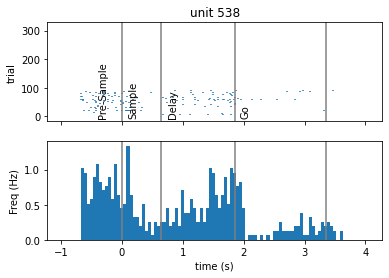

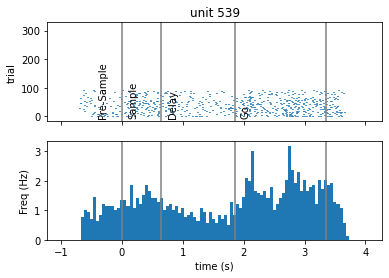

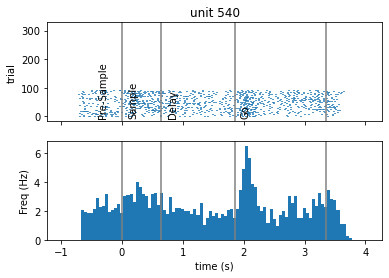

In [19]:
import seaborn as sns
ids = trials_Data.reset_index().id
on_times = trials_Data["start_time"]
off_times = trials_Data["stop_time"]
after = 4.3
before = -0.7
spike_data = []
for unit in range(538,541):
    unit_spike_times = units_Data["spike_times"][unit]
    trial_spikes = []
    i = 0
    for time in trials_Data['sample_start']:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        # Keep only spike times in a given time window around the stimulus onset
        aligned_spikes = aligned_spikes[aligned_spikes < after ]
        i = i+1
        aligned_spikes = aligned_spikes[before < aligned_spikes]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    spike_data.append(trial_spikes)
    
    axs[0].eventplot(trial_spikes)
    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])
    axs[0].text(0.1,0,'Sample',rotation=90)
    axs[0].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[0].text(0.75,0,'Delay',rotation=90)
    axs[0].text(1.95,0,'Go',rotation=90)
    axs[0].text(-0.4,0,'Pre-Sample',rotation=90)
    axs[0].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[0].axvline(3.35, color=[0.5, 0.5, 0.5])
    
    hist, edges = np.histogram(np.hstack(trial_spikes), bins=(np.arange(101)/20) - 1)
    freq = hist/len(trials_Data)*20
    width = np.diff(edges)
    axs[1].bar(edges[1:], freq,width=width)
    
    
#     axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].set_ylabel("Freq (Hz)")
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])
    axs[1].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[1].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[1].axvline(3.35, color=[0.5, 0.5, 0.5])
    #sns.kdeplot(ax=axs[1], data=np.hstack(trial_spikes))

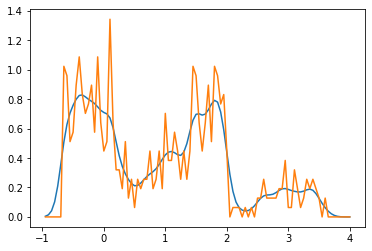

In [20]:
hist, edges = np.histogram(np.hstack(spike_data[0]), bins=(np.arange(101)/20) - 1)
freq = (hist/len(trials_Data))*20
width = np.diff(edges)
smooth_gauss = []

#plt.plot(edges[1:], freq)
for i in edges[1:]:
    gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (0.1**2) ) )
    gauss /=  sum(gauss)
    smooth_gauss.append(sum(gauss*freq))
plt.plot(edges[1:],smooth_gauss)
plt.plot(edges[1:],freq)

In [21]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(101)/20) - 1)
    freq = (hist/len(dataset))*20
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(101)/20) - 1)
    freq = (hist/len(dataset))*20
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [22]:
# for i in spike_data:
#     fig, axs = plt.subplots(1, 1, sharex="all")
#     freq,edges,smooth_gauss = get_smooth_gauss(i,0.1,'r')

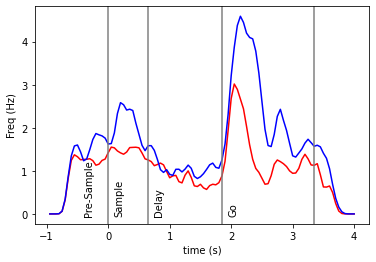

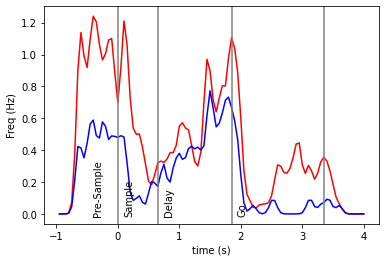

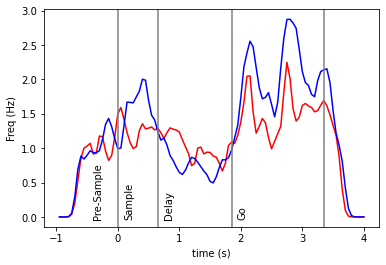

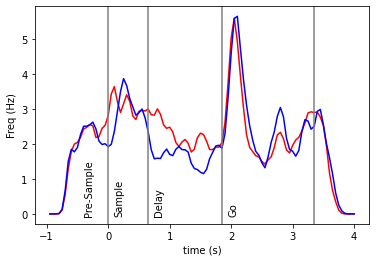

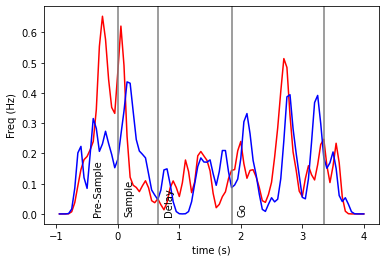

In [23]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
    after = 4.35
    before = -0.7
    spike_data = []
    
    for unit in [535,538,539,540,551]:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)            
            
        fig, axs = plt.subplots(1, 1, sharex="all")
        
        
        plt.xlabel("time (s)")
        
        get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
        get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
        axs.set_ylabel("Freq (Hz)")
        axs.axvline(0, color=[0.5, 0.5, 0.5])
        axs.axvline(0.65, color=[0.5, 0.5, 0.5])
        axs.axvline(1.85, color=[0.5, 0.5, 0.5])
        axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
        axs.text(0.1,0,'Sample',rotation=90)
        axs.text(0.75,0,'Delay',rotation=90)
        axs.text(1.95,0,'Go',rotation=90)
        axs.text(-0.4,0,'Pre-Sample',rotation=90)
get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [24]:
len(trials_Data_L),len(trials_Data_R)

(162, 151)

In [25]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for unit in units_Data.reset_index()['id']:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_l.append(aligned_spikes)
            
        frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,trials_Data_L)    
        spike_data_l.append(smooth_l)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)
            
        frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,trials_Data_R)    
        spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [26]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [27]:
diff_cd = (np.array(l)-np.array(r))
delay_avg_diff = diff_cd[:,32:57].mean(axis=1)
newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

In [28]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

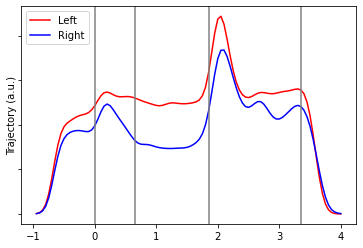

In [29]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# Distribution during delay and go phase

In [30]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

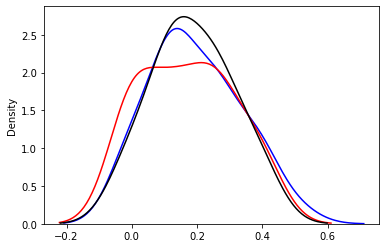

In [31]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(freq_go_l + freq_go_r, c='b')
sns.kdeplot(freq_delay_l + freq_delay_r, c='r')
sns.kdeplot(freq_sample_l + freq_sample_r, c='black')